In [2]:
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from scipy import sparse
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import time
%matplotlib inline

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## READ the Dataset

In [4]:
# loading training and test datasets
test= pd.read_csv("fashion_mnist/fashion-mnist_test.csv")
train = pd.read_csv("fashion_mnist/fashion-mnist_train.csv")
# print(test.dtype)
train = train.astype('float32')
test = test.astype('float32')
# print(test1.dtype)
# create training and test labels
fashion_train_samples = np.array(train.iloc[:,1:])/255
fashion_train_labels = np.array(train.iloc[:,0])
print(fashion_train_samples.dtype)
fashion_test_samples = np.array(test.iloc[:,1:])/255
fashion_test_labels = np.array(test.iloc[:,0])

float32


## VISUALIZE THE DATASET

In [5]:
print("Shape of train dataset", fashion_train_samples.shape)
print("Shape of test dataset", fashion_test_samples.shape)
print("Shape of train labels", fashion_train_labels.shape)
print("Shape of test labels", fashion_test_labels.shape)


Shape of train dataset (60000, 784)
Shape of test dataset (10000, 784)
Shape of train labels (60000,)
Shape of test labels (10000,)


In [6]:
print(fashion_train_samples[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01568628  0.          0.

## DISPLAY SOME IMAGES

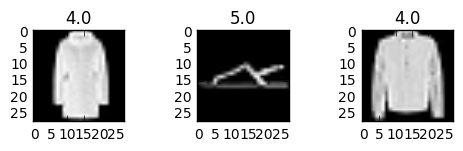

In [7]:
# sample_img = fashionMNIST.train.images[5].reshape(28, 28)
sample_img=fashion_train_samples[6].reshape(28,28)
plt.subplot(330+7)
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title(fashion_train_labels[6])
# plt.show()
sample_img=fashion_train_samples[7].reshape(28,28)
plt.subplot(330+7+1)
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title(fashion_train_labels[7])
sample_img=fashion_train_samples[8].reshape(28,28)
plt.subplot(330+8+1)
plt.imshow(sample_img, cmap=plt.get_cmap('gray'))
plt.title(fashion_train_labels[8])
plt.show()

## SKLEARN kNN Model
Train the Model

In [8]:
fashion_train_samples_sparse=sparse.csr_matrix(fashion_train_samples)
fashion_test_samples_sparse=sparse.csr_matrix(fashion_test_samples)

In [9]:
knn5_model = KNeighborsClassifier(n_neighbors = 5, n_jobs=10)


In [10]:
knn5_model.fit(fashion_train_samples_sparse, fashion_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=10, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
t1=time.time()
jobs_10_predict=knn5_model.predict(fashion_test_samples_sparse)
t2=time.time()

# AFTER FIT GO AT THE BOTTOM

In [29]:
knn5_test_predict=[]
length=len(fashion_test_labels)
for i in range(length):
    knn5_test_predict.append(knn5_model.predict(fashion_test_samples_sparse[i]))
    if(i%100==0):
        print("sample number",i,"completed")
    

sample number 0 completed
sample number 100 completed
sample number 200 completed
sample number 300 completed
sample number 400 completed
sample number 500 completed
sample number 600 completed
sample number 700 completed
sample number 800 completed
sample number 900 completed
sample number 1000 completed
sample number 1100 completed
sample number 1200 completed
sample number 1300 completed
sample number 1400 completed
sample number 1500 completed
sample number 1600 completed
sample number 1700 completed
sample number 1800 completed
sample number 1900 completed
sample number 2000 completed
sample number 2100 completed
sample number 2200 completed
sample number 2300 completed
sample number 2400 completed
sample number 2500 completed
sample number 2600 completed
sample number 2700 completed
sample number 2800 completed
sample number 2900 completed
sample number 3000 completed
sample number 3100 completed
sample number 3200 completed
sample number 3300 completed
sample number 3400 complet

In [31]:
def accuracy(y_label, y_predict):
    count=0
    for i in range (len(y_predict)):
        if y_predict[i] == y_label[i]:
            count+=1
    acc = count/len(y_predict)
    return acc

In [32]:
print(accuracy(fashion_test_labels,knn5_test_predict))

0.8589


In [33]:
knn3_model = KNeighborsClassifier(n_neighbors = 3)
knn3_model.fit(fashion_train_samples_sparse, fashion_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
knn7_model = KNeighborsClassifier(n_neighbors = 7)
knn7_model.fit(fashion_train_samples_sparse, fashion_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

# DO NOT USE BELOW PART

In [42]:
knn3_train_predict=[]
knn5_train_predict=[]
knn7_train_predict=[]
for i in range(1000):
    knn3_train_predict.append(knn3_model.predict(fashion_train_samples_sparse[i]))
    knn5_train_predict.append(knn5_model.predict(fashion_train_samples_sparse[i]))
    knn7_train_predict.append(knn7_model.predict(fashion_train_samples_sparse[i]))
#     print(i)
    if(i%100==0):
        print("sample number",i,"completed")

sample number 0 completed
sample number 100 completed
sample number 200 completed
sample number 300 completed
sample number 400 completed
sample number 500 completed
sample number 600 completed
sample number 700 completed
sample number 800 completed
sample number 900 completed


In [119]:
t1=time.time()
for i in range(1000):
    index=3000+i
    knn3_train_predict.append(knn3_model.predict(fashion_train_samples_sparse[index]))
    knn5_train_predict.append(knn5_model.predict(fashion_train_samples_sparse[index]))
    knn7_train_predict.append(knn7_model.predict(fashion_train_samples_sparse[index]))
t2=time.time()
print("Time utilized",t2-t1)
    #     print(i)
#     if(i%100==0):
#         print("sample number",i,"completed")

Time utilized 2357.7656795978546


In [120]:
t.append(t2-t1)
print(t)

[1008.8568527698517, 655.814040184021, 649.6365492343903, 675.6494228839874, 2357.7656795978546]


In [124]:
with open("train3.txt", "wb") as fp:
    pickle.dump(knn3_train_predict, fp)
with open("train5.txt", "wb") as fp:
    pickle.dump(knn5_train_predict, fp)
with open("train7.txt", "wb") as fp:
    pickle.dump(knn7_train_predict, fp)

# START FROM HERE

In [121]:
print("Accuracy of the system on train dataset (4000 samples) when k=3 is", accuracy(fashion_train_labels,knn3_train_predict))
print("Accuracy of the system on train dataset (4000 samples) when k=5 is", accuracy(fashion_train_labels,knn5_train_predict))
print("Accuracy of the system on train dataset (4000 samples) when k=7 is", accuracy(fashion_train_labels,knn7_train_predict))

Accuracy of the system on train dataset (4000 samples) when k=3 is 0.92325
Accuracy of the system on train dataset (4000 samples) when k=5 is 0.9085
Accuracy of the system on train dataset (4000 samples) when k=7 is 0.89425


In [122]:
target_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print('Train Data Classification Report with k = 3\n')
print(classification_report(fashion_train_labels[:len(knn3_train_predict)],np.array(knn3_train_predict), target_names=target_names))

Train Data Classification Report with k = 3

             precision    recall  f1-score   support

T-Shirt/Top       0.86      0.95      0.90       412
    Trouser       0.99      0.99      0.99       402
   Pullover       0.84      0.89      0.86       400
      Dress       0.94      0.93      0.93       403
       Coat       0.91      0.85      0.88       406
     Sandal       1.00      0.91      0.95       379
      Shirt       0.84      0.77      0.80       403
    Sneaker       0.94      0.98      0.96       422
        Bag       0.99      0.98      0.99       373
 Ankle Boot       0.95      0.99      0.97       400

avg / total       0.92      0.92      0.92      4000



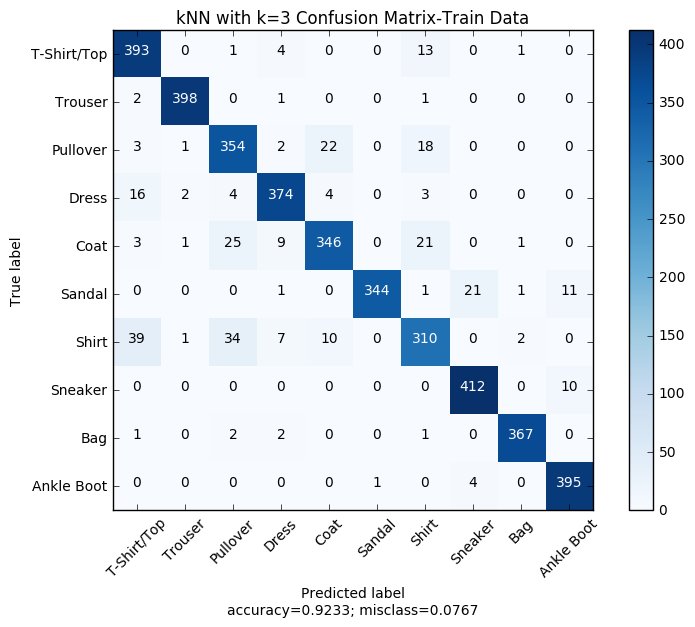

In [123]:
knn3_tr_conf_matrix=confusion_matrix(fashion_train_labels[:len(knn3_train_predict)],knn3_train_predict)
plot_confusion_matrix(cm           = knn3_tr_conf_matrix, 
                      normalize    = False,
                      target_names =  ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'],
                      title        = "kNN with k=3 Confusion Matrix-Train Data")

In [45]:
print(accuracy(fashion_train_labels,knn7_train_predict))

0.892


In [56]:
knn3_test_predict=[]
knn7_test_predict=[]
for i in range(length):
    knn3_test_predict.append(knn3_model.predict(fashion_test_samples_sparse[i]))
    knn7_test_predict.append(knn7_model.predict(fashion_test_samples_sparse[i]))
#     print(i)
    if(i%100==0):
        print("sample number",i,"completed")

sample number 0 completed
sample number 100 completed
sample number 200 completed
sample number 300 completed
sample number 400 completed
sample number 500 completed
sample number 600 completed
sample number 700 completed
sample number 800 completed
sample number 900 completed
sample number 1000 completed
sample number 1100 completed
sample number 1200 completed
sample number 1300 completed
sample number 1400 completed
sample number 1500 completed
sample number 1600 completed
sample number 1700 completed
sample number 1800 completed
sample number 1900 completed
sample number 2000 completed
sample number 2100 completed
sample number 2200 completed
sample number 2300 completed
sample number 2400 completed
sample number 2500 completed
sample number 2600 completed
sample number 2700 completed
sample number 2800 completed
sample number 2900 completed
sample number 3000 completed
sample number 3100 completed
sample number 3200 completed
sample number 3300 completed
sample number 3400 complet

In [75]:
print("Accuracy of the system on test dataset when k=3 is", accuracy(fashion_test_labels,knn3_test_predict))
print("Accuracy of the system on test dataset when k=5 is", accuracy(fashion_test_labels,knn5_test_predict))
print("Accuracy of the system on test dataset when k=7 is", accuracy(fashion_test_labels,knn7_test_predict))

Accuracy of the system on test dataset when k=3 is 0.8584
Accuracy of the system on test dataset when k=5 is 0.8589
Accuracy of the system on test dataset when k=7 is 0.8558


In [76]:
target_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print('Test Data Classification Report with k = 3\n')
print(classification_report(fashion_test_labels,np.array(knn3_test_predict), target_names=target_names))

Test Data Classification Report with k = 3

             precision    recall  f1-score   support

T-Shirt/Top       0.75      0.87      0.80      1000
    Trouser       0.99      0.97      0.98      1000
   Pullover       0.74      0.82      0.78      1000
      Dress       0.91      0.87      0.89      1000
       Coat       0.81      0.77      0.79      1000
     Sandal       0.99      0.82      0.90      1000
      Shirt       0.68      0.59      0.63      1000
    Sneaker       0.88      0.94      0.91      1000
        Bag       0.98      0.95      0.97      1000
 Ankle Boot       0.88      0.97      0.92      1000

avg / total       0.86      0.86      0.86     10000



In [77]:
target_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print('Test Data Classification Report with k = 5\n')
print(classification_report(fashion_test_labels,np.array(knn5_test_predict), target_names=target_names))

Test Data Classification Report with k = 5

             precision    recall  f1-score   support

T-Shirt/Top       0.77      0.87      0.82      1000
    Trouser       0.99      0.96      0.98      1000
   Pullover       0.75      0.81      0.78      1000
      Dress       0.91      0.88      0.90      1000
       Coat       0.79      0.80      0.79      1000
     Sandal       1.00      0.82      0.90      1000
      Shirt       0.68      0.58      0.63      1000
    Sneaker       0.87      0.94      0.91      1000
        Bag       0.98      0.95      0.97      1000
 Ankle Boot       0.88      0.96      0.92      1000

avg / total       0.86      0.86      0.86     10000



In [79]:
target_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print('Test Data Classification Report with k = 7\n')
print(classification_report(fashion_test_labels,np.array(knn7_test_predict), target_names=target_names))

Test Data Classification Report with k = 7

             precision    recall  f1-score   support

T-Shirt/Top       0.77      0.86      0.81      1000
    Trouser       0.99      0.96      0.98      1000
   Pullover       0.76      0.79      0.77      1000
      Dress       0.92      0.88      0.90      1000
       Coat       0.79      0.80      0.80      1000
     Sandal       0.99      0.81      0.89      1000
      Shirt       0.66      0.59      0.62      1000
    Sneaker       0.86      0.94      0.90      1000
        Bag       0.98      0.95      0.96      1000
 Ankle Boot       0.88      0.97      0.92      1000

avg / total       0.86      0.86      0.86     10000



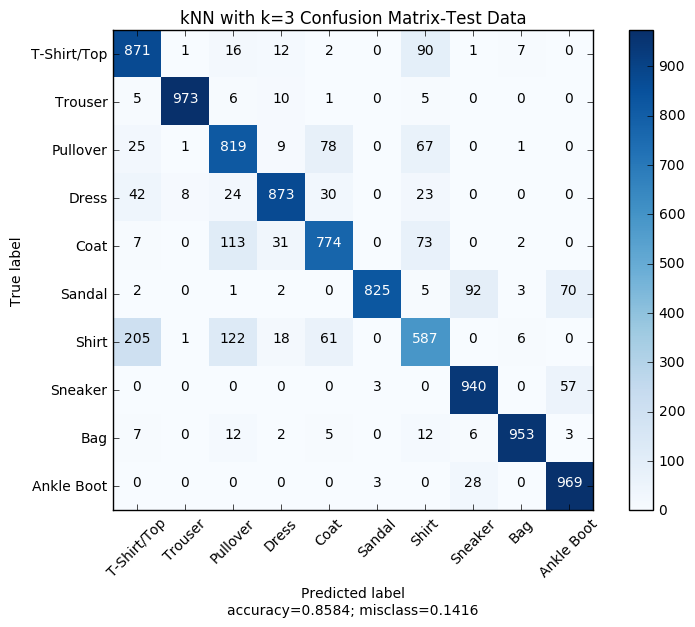

In [81]:
knn3_conf_matrix=confusion_matrix(fashion_test_labels,knn3_test_predict)
plot_confusion_matrix(cm           = knn3_conf_matrix, 
                      normalize    = False,
                      target_names =  ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'],
                      title        = "kNN with k=3 Confusion Matrix-Test Data")

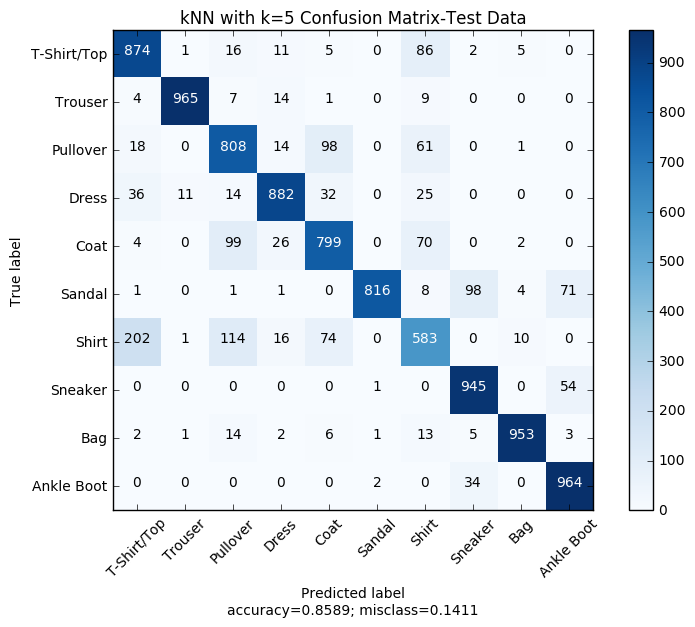

In [82]:
knn5_conf_matrix=confusion_matrix(fashion_test_labels,knn5_test_predict)
plot_confusion_matrix(cm           = knn5_conf_matrix, 
                      normalize    = False,
                      target_names =  ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'],
                      title        = "kNN with k=5 Confusion Matrix-Test Data")

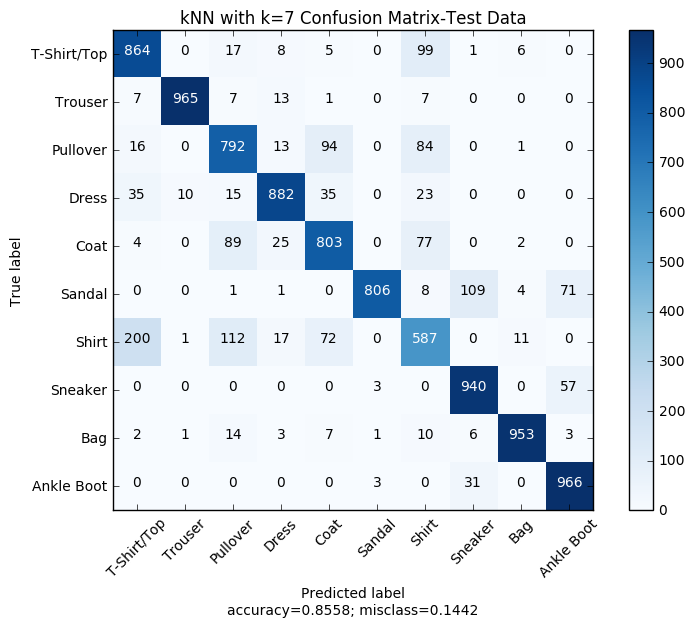

In [83]:
knn7_conf_matrix=confusion_matrix(fashion_test_labels,knn7_test_predict)
plot_confusion_matrix(cm           = knn7_conf_matrix, 
                      normalize    = False,
                      target_names =  ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'],
                      title        = "kNN with k=7 Confusion Matrix-Test Data")

In [78]:
with open("test3.txt", "wb") as fp:
    pickle.dump(knn3_test_predict, fp)

with open("test7.txt", "wb") as fp:
    pickle.dump(knn7_test_predict, fp)

In [46]:
import pickle

In [54]:
with open("test5.txt", "wb") as fp:
    pickle.dump(knn5_test_predict, fp)


In [55]:
with open("test5.txt", "rb") as fp:   # Unpickling
    t5 = pickle.load(fp)
    
print(len(t5))

10000


In [102]:
with open("train3.txt", "rb") as fp:   # Unpickling
    b3 = pickle.load(fp)
with open("train5.txt", "rb") as fp:   # Unpickling
    b5 = pickle.load(fp)
with open("train7.txt", "rb") as fp:   # Unpickling
    b7 = pickle.load(fp)
    
    

print(len(b3))
print(len(b5))
print(len(b7))

1500
1500
1500


with open("test.txt", "wb") as fp:   #Pickling
...   pickle.dump(l, fp)
... 
>>> with open("test.txt", "rb") as fp:   # Unpickling
...   b = pickle.load(fp)
... 

In [53]:
print(accuracy(fashion_train_labels,b5))

0.901


# AFTER FIT USE BELOW LINES

In [21]:
knn3_pred_test=knn3_model.predict(fashion_test_samples_sparse)

In [22]:
knn5_pred_test=knn5_model.predict(fashion_test_samples_sparse)

In [23]:
knn7_pred_test10=knn7_model.predict(fashion_test_samples_sparse)

In [ ]:
knn3_pred_test=knn3_model.predict(fashion_test_samples_sparse[0:])

In [8]:
neigh.score(fashion_test_samples, fashion_test_labels)

0.85840000000000005

In [ ]:
#https://github.com/anujdutt9/Fashion-MNIST